In [49]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import scipy.stats as st
from matplotlib import cm


# visualize surface using 3D and 2D

def plot_surface(xx1, xx2, surface, z_height, title_txt):
    
    # plt.figaspect(0.5)
    fig = plt.figure(figsize=plt.figaspect(0.5))

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    
    # 线框图
    ax.plot_wireframe(xx1, xx2, surface,
                      color=[0.7, 0.7, 0.7],
                      linewidth=0.25)
    
    # 等高线图
    ax.contour3D(xx1, xx2, surface, 20,
                 cmap='RdYlBu_r')

    ax.set_proj_type('ortho')

    ax.set_xlabel('Sepal length, $x_1$')
    ax.set_ylabel('Sepal width, $x_2$')
    ax.set_zlabel('PDF')
    # ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_xticks([4, 5, 6, 7, 8])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(x2.min(), x2.max())
    ax.set_zlim3d([0, z_height])
    ax.view_init(azim=-120, elev=30)
    ax.set_title(title_txt)
    ax.grid(False)
    plt.show()

    ax = fig.add_subplot(1, 2, 2)

    # Contourf plot
    # cfset = ax.contourf(xx1, xx2, surface, 12, cmap='RdYlBu_r')
    # cset = ax.contour(xx1, xx2, surface, 12, colors='w')

    cset = ax.contour(xx1, xx2, surface, 20, cmap='RdYlBu_r')
    ax.set_xticks([4, 5, 6, 7, 8])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(x2.min(), x2.max())
    # Label plot
    # ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('Sepal length, $x_1$')
    ax.set_ylabel('Sepal width, $x_2$')
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_title(title_txt)
    # plt.show()


# visualize 2D PDF contour and marginal

import matplotlib.gridspec as gridspec


def plot_joint_marginal(xx1, xx2, surface,
                        x1, f_x1,
                        x2, f_x2,
                        x1_s, x2_s,
                        color, title_txt):
    fig = plt.figure(figsize=(7, 7))
    
    # 在单个图形窗口创建多个子图，并设置宽高比
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[3, 1],
                           height_ratios=[3, 1])

    # # gs.update(wspace=0., hspace=0.)
    # plt.suptitle('Marginal distributions', y=0.93)

    # Plot surface on top left
    ax1 = plt.subplot(gs[0])

    # Plot bivariate normal
    ax1.contour(xx1, xx2, surface, 20, cmap='RdYlBu_r')
    ax1.scatter(x1_s, x2_s, c=color)

    ax1.set_xlabel('Sepal length, $x_1$')
    ax1.set_ylabel('Sepal width, $x_2$')
    ax1.yaxis.set_label_position('right')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(title_txt)

    # Plot Y marginal
    ax2 = plt.subplot(gs[1])

    ax2.plot(f_x2, x2, color=color)

    ax2.fill_between(f_x2, x2,
                     edgecolor='none',
                     facecolor=color,
                     alpha=0.2)

    ax2.set_xlabel('PDF')
    ax2.set_ylim(1, 5)
    ax2.set_xlim(0, 1.5)
    ax2.set_xticks([0, 0.5, 1, 1.5])
    ax2.set_yticks([1, 2, 3, 4, 5])
    ax2.invert_xaxis()
    ax2.yaxis.tick_right()

    # Plot X marginal
    ax3 = plt.subplot(gs[2])

    ax3.plot(x1, f_x1, color=color)

    ax3.fill_between(x1, f_x1,
                     edgecolor='none',
                     facecolor=color,
                     alpha=0.2)

    ax3.set_ylabel('PDF')
    ax3.yaxis.set_label_position('left')
    ax3.set_xlim(4, 8)
    ax3.set_xticks([4, 5, 6, 7, 8])
    ax3.set_ylim(0, 1.5)
    ax3.set_yticks([0, 0.5, 1, 1.5])
    ax4 = plt.subplot(gs[3])
    ax4.set_visible(False)

    # plt.show()



     label
0        0
1        0
2        0
3        0
4        0
..     ...
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]
    label
0     C_1
1     C_1
2     C_1
3     C_1
4     C_1
..    ...
145   C_3
146   C_3
147   C_3
148   C_3
149   C_3

[150 rows x 1 columns]


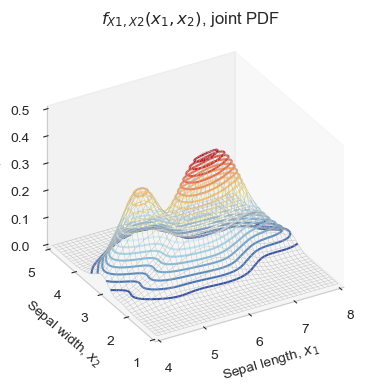

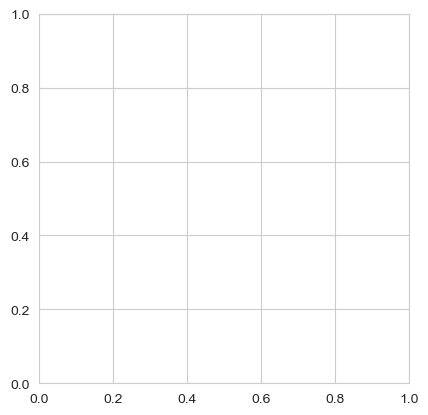

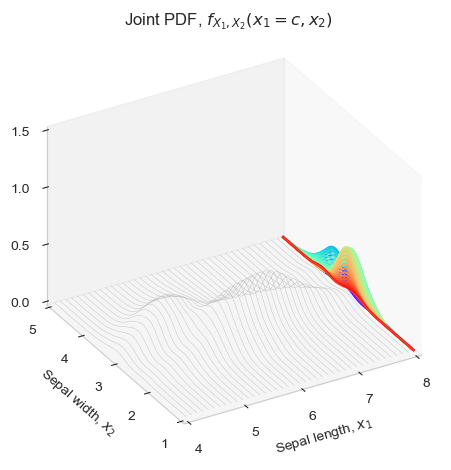

In [50]:
# plt.close('all')

iris = load_iris()
# A copy from Sklearn

X_1_to_4 = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

X_df = pd.DataFrame(X_1_to_4, columns=feature_names)
y_df = pd.DataFrame(y, columns=['label'])

print(y_df)
y_df[y_df == 0] = 'C_1'
y_df[y_df == 1] = 'C_2'
y_df[y_df == 2] = 'C_3'
print(y_df)

X1_2_df = X_df[['Sepal length, $X_1$', 'Sepal width, $X_2$']]

x1 = np.linspace(4, 8, 161)
x2 = np.linspace(1, 5, 161)

# 生成坐标位置
xx1, xx2 = np.meshgrid(x1, x2)
positions = np.vstack([xx1.ravel(), xx2.ravel()])

# 拟合一个高斯核密度估计
kernel = st.gaussian_kde(X1_2_df.values.T)
# 计算核密度
f_x1_x2_SM = np.reshape(kernel(positions).T, xx1.shape)

z_height = 0.5
title_txt = '$f_{X1, X2}(x_1, x_2)$, joint PDF'
plot_surface(xx1, xx2, f_x1_x2_SM, z_height, title_txt)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, f_x1_x2_SM,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=0, cstride=4)


ax.contour(xx1, xx2, f_x1_x2_SM,
           levels=40, zdir='x', \
           offset=xx1.max(), cmap='rainbow')
# zdir='x': 指定等高线图应该沿着哪个轴绘制。'x' 表示等高线是在 y-z 平面上投影的，即等高线垂直于 x 轴
# offset=xx1.max()指定等高线图在 x 轴上的偏移量。在这里，等高线图被偏移到 xx1 坐标的最大值处

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1 = c,x_2)$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)
# plt.show()


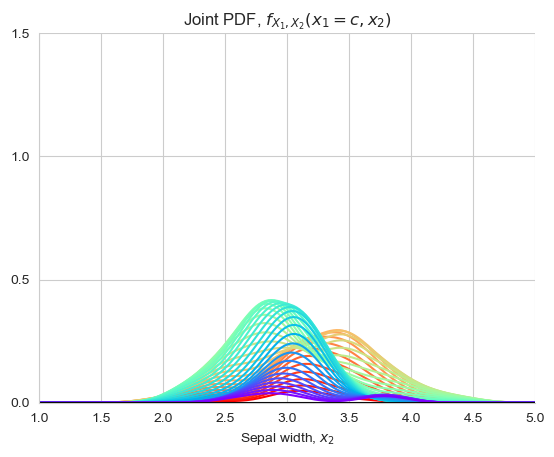

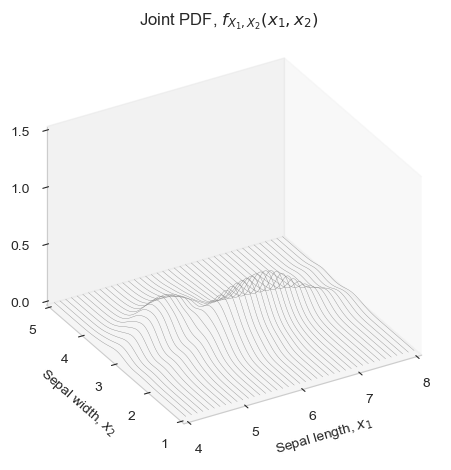

RuntimeError: Can not put single artist in more than one figure

Error in callback <function _draw_all_if_interactive at 0x000002186694BD00> (for post_execute):


AttributeError: 'Axes' object has no attribute 'get_proj'

AttributeError: 'Axes' object has no attribute 'get_proj'

<Figure size 640x480 with 1 Axes>

In [61]:
# project down-sampled surface

down_step = 4;
array_downsample = x1[0::down_step]

fig, ax = plt.subplots()

colors = plt.cm.rainbow_r(np.linspace(0, 1, len(array_downsample)))

for i in np.linspace(1, len(array_downsample), len(array_downsample)):
    plt.plot(x2, f_x1_x2_SM[:, (int(i) - 1) * down_step],
             color=colors[int(i) - 1])

plt.axhline(y=0, color='k', linestyle='-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Sepal width, $x_2$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1 = c,x_2)$')
ax.set_xlim(xx2.min(), xx2.max())
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 0.5, 1.0, 1.5])

X1_df = X_df['Sepal length, $X_1$']

# 创建 KDEUnivariate 对象，用来拟合 X1_df 这个单变量数据集的概率密度函数
KDE_X1 = sm.nonparametric.KDEUnivariate(X1_df)
# 拟合 KDE 模型
KDE_X1.fit(bw=0.1)

f_x1_marginal = KDE_X1.evaluate(x1)
# KDE_X1.evaluate(x1) 将返回一个与 x1 相同长度的数组，其中包含了每个点的密度估计值

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, f_x1_x2_SM,
                  color=[0.5, 0.5, 0.5],
                  rstride=0, cstride=4,
                  linewidth=0.25)

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)
plt.show()

x_loc_array = np.arange(0,len(x1),20)
facecolors = cm.rainbow(np.linspace(0, 1, len(x_loc_array)))

for idx in range(len(x_loc_array)):
    x_loc = x_loc_array[idx]
    x_idx = x1[x_loc]
    x_i_array = x2*0 + x_idx
    z_array = f_x1_x2_SM[:,x_loc]
    
    ax.plot(x_i_array, x2, z_array, color=facecolors[idx,:],
            linewidth = 1.5)
    
    ax.add_collection3d(plt.fill_between(x2, 0*z_array, z_array, 
                                         color=facecolors[idx,:], alpha=0.3), 
                        zs=x_idx, zdir='x')

# add marginal distribution over X1

ax.plot(x1, x1*0 + 5, f_x1_marginal, linewidth = 1.5,
        color = '#00448A') 


for i in range(len(x_loc_array)):
    x_loc = x_loc_array[i]
    x_idx = x1[x_loc]

    ax.plot([x_idx, x_idx], [x2.max(), x2.max()],
            [0, f_x1_marginal[x_loc]],
            color=facecolors[i, :],
            linewidth=1.5)

    ax.plot(x_idx, x2.max(), f_x1_marginal[x_loc],
            marker='x',
            color=facecolors[i, :])


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


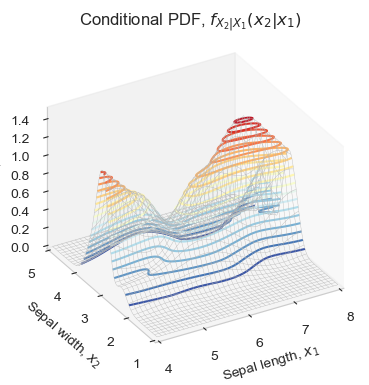

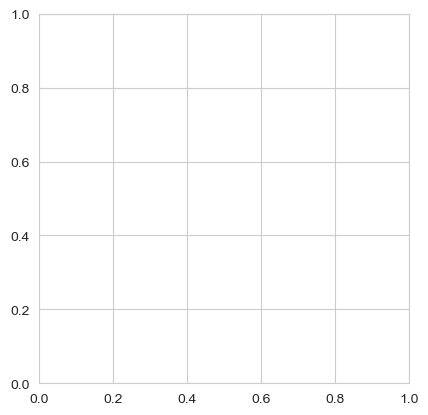

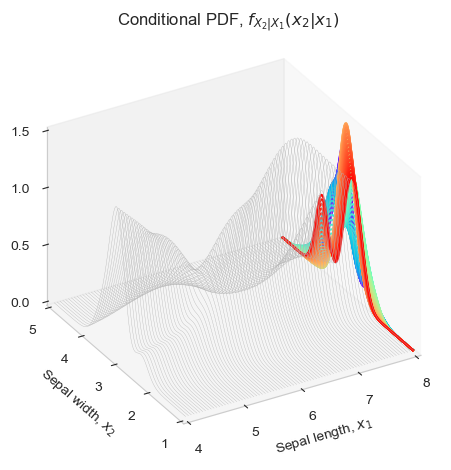

In [53]:
delta_x = 4 / 160

# 条件概率
conditional_X2_given_X1_matrix = f_x1_x2_SM / (np.ones((161, 1)) @ np.array([f_x1_x2_SM.sum(axis=0)]) * delta_x)

partial_integral_over_x2 = conditional_X2_given_X1_matrix.sum(axis=0) * delta_x
# test only
print(partial_integral_over_x2)

z_height = 1.5
title_txt = 'Conditional PDF, $f_{X_2 | X_1}(x_2 | x_1)$'
plot_surface(xx1, xx2, conditional_X2_given_X1_matrix, z_height, title_txt)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, conditional_X2_given_X1_matrix,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=0, cstride=2)

ax.contour(xx1, xx2, conditional_X2_given_X1_matrix,
           levels=80, zdir='x', \
           offset=xx1.max(), cmap='rainbow')

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Conditional PDF, $f_{X_2 | X_1}(x_2 | x_1)$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
plt.tight_layout()
plt.show()


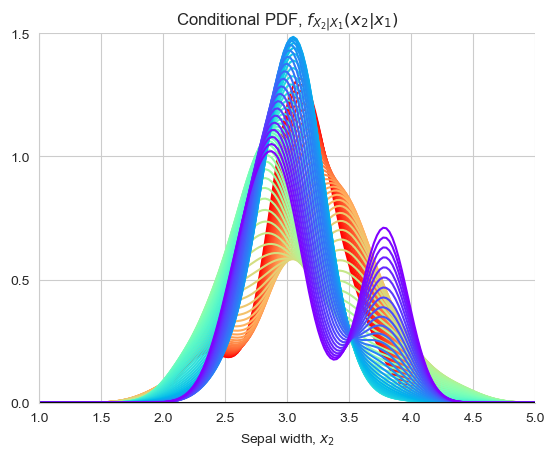

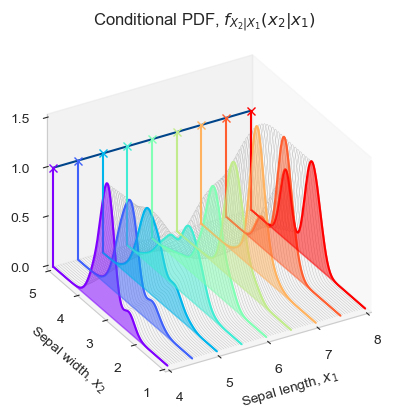

<Figure size 640x480 with 0 Axes>

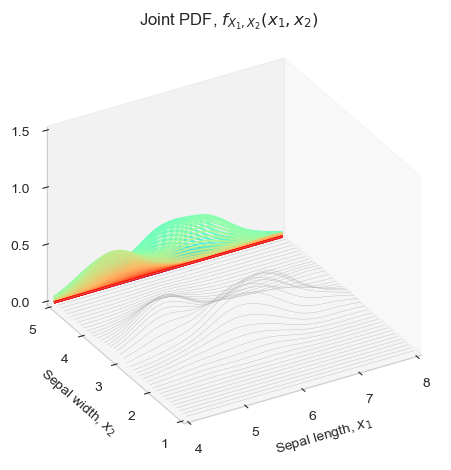

In [54]:
# project down-sampled surface

down_step = 2;
y_array_downsample = x1[0::down_step]

fig, ax = plt.subplots()

colors = plt.cm.rainbow_r(np.linspace(0, 1, len(y_array_downsample)))

for i in np.linspace(1, len(y_array_downsample), len(y_array_downsample)):
    plt.plot(x2, conditional_X2_given_X1_matrix[:, (int(i) - 1) * down_step],
             color=colors[int(i) - 1])

plt.axhline(y=0, color='k', linestyle='-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Sepal width, $x_2$')
ax.set_title('Conditional PDF, $f_{X_2 | X_1}(x_2 | x_1)$')
ax.set_xlim(xx2.min(), xx2.max())
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 0.5, 1.0, 1.5])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, conditional_X2_given_X1_matrix,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=0, cstride=2)

ax.set_proj_type('ortho')

x_loc_array = np.arange(0, len(x1), 20)
facecolors = cm.rainbow(np.linspace(0, 1, len(x_loc_array)))

for idx in range(len(x_loc_array)):
    x_loc = x_loc_array[idx]
    x_idx = x1[x_loc]
    x_i_array = x2 * 0 + x_idx
    z_array = conditional_X2_given_X1_matrix[:, x_loc]

    ax.plot(x_i_array, x2, z_array, color=facecolors[idx, :],
            linewidth=1.5)

    ax.add_collection3d(plt.fill_between(x2, 0 * z_array, z_array,
                                         color=facecolors[idx, :], alpha=0.3),
                        zs=x_idx, zdir='x')

# add partial integral over X2

ax.plot(x1, x1 * 0 + 5, partial_integral_over_x2, linewidth=1.5,
        color='#00448A')

for i in range(len(x_loc_array)):
    x_loc = x_loc_array[i]
    x_idx = x1[x_loc]

    ax.plot([x_idx, x_idx], [x2.max(), x2.max()],
            [0, partial_integral_over_x2[x_loc]],
            color=facecolors[i, :],
            linewidth=1.5)

    ax.plot(x_idx, x2.max(),
            partial_integral_over_x2[x_loc],
            marker='x',
            color=facecolors[i, :])

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Conditional PDF, $f_{X_2 | X_1}(x_2 | x_1)$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
plt.show()
plt.tight_layout()

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, f_x1_x2_SM,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=4, cstride=0)

ax.contour(xx1, xx2, f_x1_x2_SM,
           levels=80, zdir='y', \
           offset=xx2.max(), cmap='rainbow')

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)
plt.show()


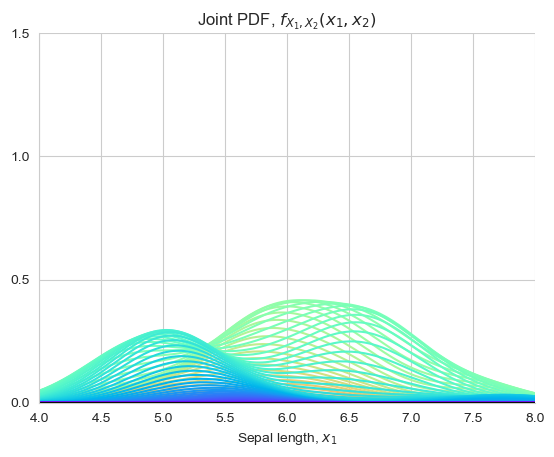

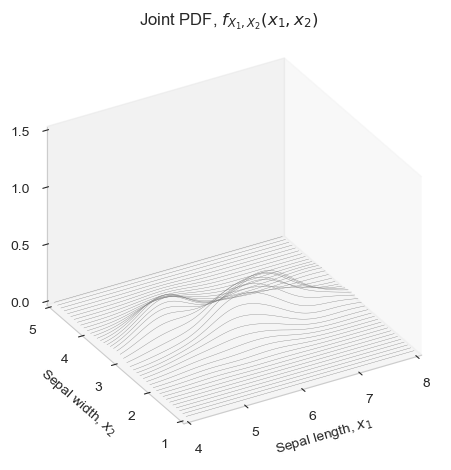

RuntimeError: Can not put single artist in more than one figure

Error in callback <function _draw_all_if_interactive at 0x000002186694BD00> (for post_execute):


AttributeError: 'Axes' object has no attribute 'get_proj'

AttributeError: 'Axes' object has no attribute 'get_proj'

<Figure size 640x480 with 1 Axes>

In [55]:
# project down-sampled surface

down_step = 2;
array_downsample = x2[0::down_step]

fig, ax = plt.subplots()

colors = plt.cm.rainbow_r(np.linspace(0, 1, len(array_downsample)))

for i in np.linspace(1, len(array_downsample), len(array_downsample)):
    plt.plot(x1, f_x1_x2_SM[(int(i) - 1) * down_step, :],
             color=colors[int(i) - 1])

plt.axhline(y=0, color='k', linestyle='-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Sepal length, $x_1$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 0.5, 1.0, 1.5])

X2_df = X_df['Sepal width, $X_2$']

KDE_X2 = sm.nonparametric.KDEUnivariate(X2_df)
KDE_X2.fit(bw=0.1)

f_x2_marginal = KDE_X2.evaluate(x2)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, f_x1_x2_SM,
                  color=[0.5, 0.5, 0.5],
                  rstride=4, cstride=0,
                  linewidth=0.25)

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Joint PDF, $f_{X_1,X_2}(x_1,x_2)$')
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
plt.tight_layout()
ax.grid(False)
plt.show()

x_loc_array = np.arange(0, len(x2), 20)
facecolors = cm.rainbow(np.linspace(0, 1, len(x_loc_array)))

for idx in range(len(x_loc_array)):
    x_loc = x_loc_array[idx]
    x_idx = x2[x_loc]
    x_i_array = x1 * 0 + x_idx
    z_array = f_x1_x2_SM[x_loc, :]

    ax.plot(x1, x_i_array, z_array, color=facecolors[idx, :],
            linewidth=1.5)

    ax.add_collection3d(plt.fill_between(x1, 0 * z_array, z_array,
                                         color=facecolors[idx, :], alpha=0.3),
                        zs=x_idx, zdir='y')

# add marginal distribution over X1

ax.plot(x2 * 0 + 8, x2, f_x2_marginal, linewidth=1.5,
        color='#00448A')

for i in range(len(x_loc_array)):
    x_loc = x_loc_array[i]
    x_idx = x2[x_loc]

    ax.plot([x1.max(), x1.max()], [x_idx, x_idx],
            [0, f_x2_marginal[x_loc]],
            color=facecolors[i, :],
            linewidth=1.5)

    ax.plot(x1.max(), x_idx, f_x2_marginal[x_loc],
            marker='x',
            color=facecolors[i, :])

title_txt = 'Joint PDF, $f_{X1,X2}(x_1,x_2)$'

plot_joint_marginal(xx1, xx2, f_x1_x2_SM,
                    x1, f_x1_marginal,
                    x2, f_x2_marginal,
                    X1_2_df['Sepal length, $X_1$'], X1_2_df['Sepal width, $X_2$'],
                    '#00448A', title_txt)

title_txt = 'Joint PDF, $f_{X1,X2}(x_1,x_2)$, independence'

plot_joint_marginal(xx1, xx2, f_x2_marginal.reshape(-1, 1) @ f_x1_marginal.reshape(1, -1),
                    x1, f_x1_marginal,
                    x2, f_x2_marginal,
                    X1_2_df['Sepal length, $X_1$'], X1_2_df['Sepal width, $X_2$'],
                    '#00448A', title_txt)

delta_x = 4 / 160

conditional_X1_given_X2_matrix = f_x1_x2_SM / (f_x1_x2_SM.sum(axis=1).reshape(-1, 1) @ np.ones((1, 161)) * delta_x)

partial_integral_over_x1 = conditional_X1_given_X2_matrix.sum(axis=1) * delta_x
# test only
print(partial_integral_over_x1)

z_height = 1.5
title_txt = 'Conditional PDF, $f_{X_1 | X_2}(x_1 | x_2)$'
plot_surface(xx1, xx2, conditional_X1_given_X2_matrix, z_height, title_txt)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, conditional_X1_given_X2_matrix,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=2, cstride=0)

ax.contour(xx1, xx2, conditional_X1_given_X2_matrix,
           levels=80, zdir='y', \
           offset=xx2.max(), cmap='rainbow')

ax.set_proj_type('ortho')

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Conditional PDF, $f_{X_1 | X_2}(x_1 | x_2)$')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
plt.tight_layout()
plt.show()


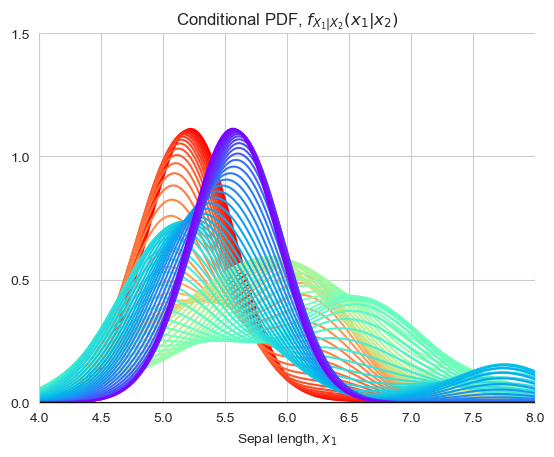

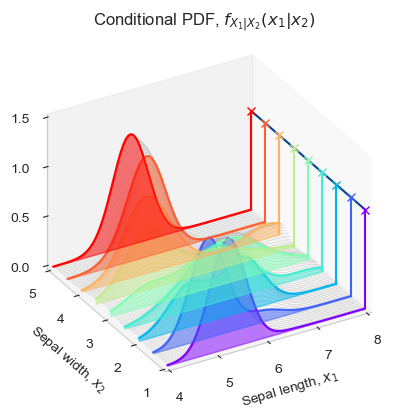

<Figure size 640x480 with 0 Axes>

In [58]:
# project down-sampled surface

down_step = 2;
y_array_downsample = x2[0::down_step]

fig, ax = plt.subplots()

colors = plt.cm.rainbow_r(np.linspace(0, 1, len(y_array_downsample)))

for i in np.linspace(1, len(y_array_downsample), len(y_array_downsample)):
    plt.plot(x1, conditional_X1_given_X2_matrix[(int(i) - 1) * down_step, :],
             color=colors[int(i) - 1])

plt.axhline(y=0, color='k', linestyle='-')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Sepal length, $x_1$')
ax.set_title('Conditional PDF, $f_{X_1 | X_2}(x_1 | x_2)$')
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(0, 1.5)
ax.set_yticks([0, 0.5, 1.0, 1.5])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx1, xx2, conditional_X1_given_X2_matrix,
                  color=[0.7, 0.7, 0.7],
                  linewidth=0.25,
                  rstride=2, cstride=0)

ax.set_proj_type('ortho')

x_loc_array = np.arange(0, len(x1), 20)
facecolors = cm.rainbow(np.linspace(0, 1, len(x_loc_array)))

for idx in range(len(x_loc_array)):
    x_loc = x_loc_array[idx]
    x_idx = x2[x_loc]
    x_i_array = x1 * 0 + x_idx
    z_array = conditional_X1_given_X2_matrix[x_loc, :]

    ax.plot(x1, x_i_array, z_array, color=facecolors[idx, :],
            linewidth=1.5)

    ax.add_collection3d(plt.fill_between(x1, 0 * z_array, z_array,
                                         color=facecolors[idx, :], alpha=0.3),
                        zs=x_idx, zdir='y')

# add partial integral over X2

ax.plot(x1 * 0 + 8, x2, partial_integral_over_x1, linewidth=1.5,
        color='#00448A')

for i in range(len(x_loc_array)):
    x_loc = x_loc_array[i]
    x_idx = x2[x_loc]

    ax.plot([x1.max(), x1.max()], [x_idx, x_idx],
            [0, partial_integral_over_x1[x_loc]],
            color=facecolors[i, :],
            linewidth=1.5)

    ax.plot(x1.max(), x_idx,
            partial_integral_over_x1[x_loc],
            marker='x',
            color=facecolors[i, :])

ax.set_xlabel('Sepal length, $x_1$')
ax.set_ylabel('Sepal width, $x_2$')
ax.set_title('Conditional PDF, $f_{X_1 | X_2}(x_1 | x_2)$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xticks([4, 5, 6, 7, 8])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(x2.min(), x2.max())
ax.set_zlim3d([0, 1.5])
ax.view_init(azim=-120, elev=30)
ax.grid(False)
plt.show()
plt.tight_layout()


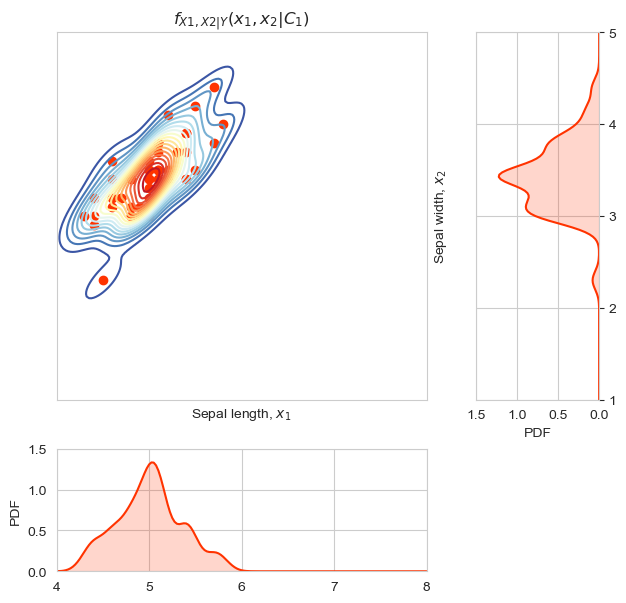

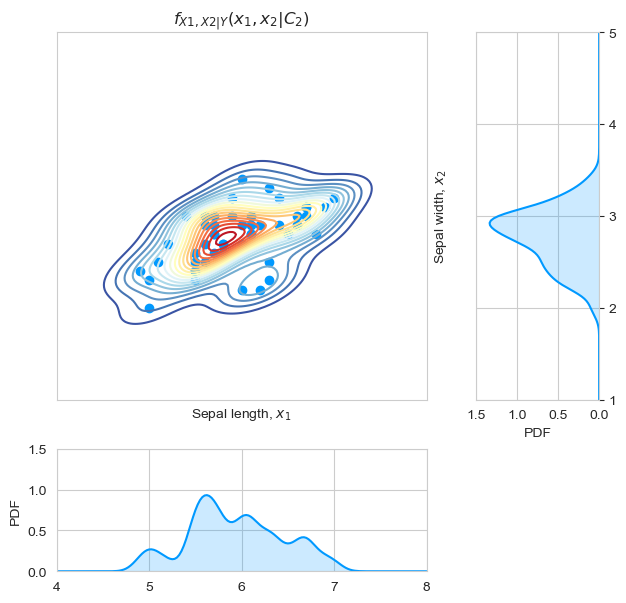

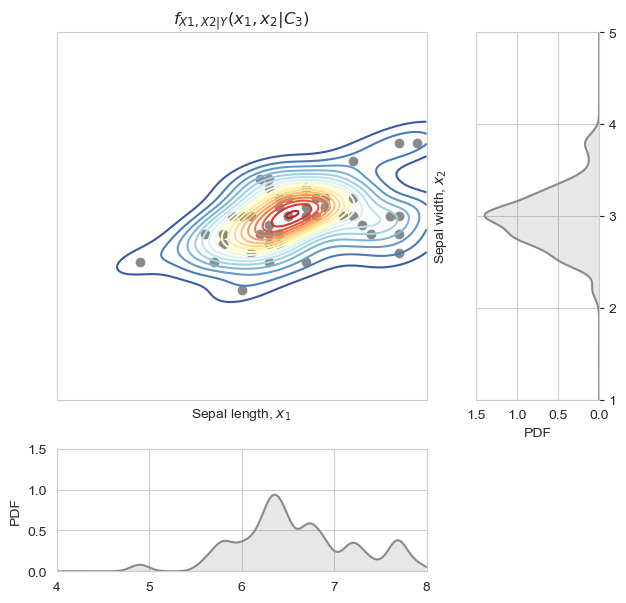

In [59]:
# given C1 (y = 0)

kernel = st.gaussian_kde(X1_2_df[y == 0].values.T)
f_x1_x2_given_C1 = np.reshape(kernel(positions).T, xx1.shape)

x1_s_C1 = X1_2_df['Sepal length, $X_1$'][y == 0]

KDE_x1_given_C1 = sm.nonparametric.KDEUnivariate(x1_s_C1)
KDE_x1_given_C1.fit(bw=0.1)

f_x1_given_C1 = KDE_x1_given_C1.evaluate(x1)

x2_s_C1 = X1_2_df['Sepal width, $X_2$'][y == 0]

KDE_x2_given_C1 = sm.nonparametric.KDEUnivariate(x2_s_C1)
KDE_x2_given_C1.fit(bw=0.1)

f_x2_given_C1 = KDE_x2_given_C1.evaluate(x2)

title_txt = '$f_{X1,X2|Y}(x_1,x_2|C_1)$'
plot_joint_marginal(xx1, xx2, f_x1_x2_given_C1,
                    x1, f_x1_given_C1,
                    x2, f_x2_given_C1,
                    x1_s_C1, x2_s_C1,
                    '#FF3300', title_txt)

# given C2 (y = 1)

kernel = st.gaussian_kde(X1_2_df[y == 1].values.T)
f_x1_x2_given_C2 = np.reshape(kernel(positions).T, xx1.shape)

x1_s_C2 = X1_2_df['Sepal length, $X_1$'][y == 1]

KDE_x1_given_C2 = sm.nonparametric.KDEUnivariate(x1_s_C2)
KDE_x1_given_C2.fit(bw=0.1)

f_x1_given_C2 = KDE_x1_given_C2.evaluate(x1)

x2_s_C2 = X1_2_df['Sepal width, $X_2$'][y == 1]

KDE_x2_given_C2 = sm.nonparametric.KDEUnivariate(x2_s_C2)
KDE_x2_given_C2.fit(bw=0.1)

f_x2_given_C2 = KDE_x2_given_C2.evaluate(x2)

title_txt = '$f_{X1,X2|Y}(x_1,x_2|C_2)$'
plot_joint_marginal(xx1, xx2, f_x1_x2_given_C2,
                    x1, f_x1_given_C2,
                    x2, f_x2_given_C2,
                    x1_s_C2, x2_s_C2,
                    '#0099FF', title_txt)

# given C3 (y = 2)

kernel = st.gaussian_kde(X1_2_df[y == 2].values.T)
f_x1_x2_given_C3 = np.reshape(kernel(positions).T, xx1.shape)

x1_s_C3 = X1_2_df['Sepal length, $X_1$'][y == 2]

KDE_x1_given_C3 = sm.nonparametric.KDEUnivariate(x1_s_C3)
KDE_x1_given_C3.fit(bw=0.1)

f_x1_given_C3 = KDE_x1_given_C3.evaluate(x1)

x2_s_C3 = X1_2_df['Sepal width, $X_2$'][y == 2]

KDE_x2_given_C3 = sm.nonparametric.KDEUnivariate(x2_s_C3)
KDE_x2_given_C3.fit(bw=0.1)

f_x2_given_C3 = KDE_x2_given_C3.evaluate(x2)

title_txt = '$f_{X1,X2|Y}(x_1,x_2|C_3)$'
plot_joint_marginal(xx1, xx2, f_x1_x2_given_C3,
                    x1, f_x1_given_C3,
                    x2, f_x2_given_C3,
                    x1_s_C3, x2_s_C3,
                    '#8A8A8A', title_txt)